1)knihovny a moduly

Skalární součin

In [5]:
import numpy as np
import time
from sympy import Symbol,solve
from scipy import linalg

def sk(u,v):

  t0=time.time()
  s=0
  if len(u)==len(v):
    for i in range(len(u)):
      s+= u[i]*v[i]
    return s,time.time()-t0
  else:
    return "Vektory musí být stejně velké."
    
print(sk([1,2,3],[4,5,6]))

def sk2(u,v):

  t0=time.time()
  return np.dot(u,v),time.time()-t0

print(sk2(np.array([1,2,3]),np.array([4,5,6])))

(32, 3.337860107421875e-06)
(32, 3.075599670410156e-05)


Násobení matice

In [11]:
def nasob(a,b):

  t0=time.time()
  c=[[0]*len(b[0])]*len(a)
  for i in range(len(a)):
    for j in range(len(b[0])):
      c[i][j]=sum([a[i][x]*b[x][j] for x in range(len(b[0]))])
  return c,time.time()-t0
  

def nasob2(a,b):

  t0=time.time()
  return np.matmul(a,b),time.time()-t0
  
print(nasob([[1,2,3],[1,2,3]],[[1,2,3],[1,2,3],[1,2,3]]))
print(nasob2(np.array([[1,2,3],[1,2,3]]),np.array([[1,2,3],[1,2,3],[1,2,3]])))

([[6, 12, 18], [6, 12, 18]], 2.0503997802734375e-05)
(array([[ 6, 12, 18],
       [ 6, 12, 18]]), 2.4557113647460938e-05)


řešení homogenní kvadratické rovnice


In [13]:
x=Symbol("x")

def kvrov(kpolynom):

  t0=time.time()
  abc=[]
  
  for a,clen in enumerate(kpolynom):
    
    if clen not in [" ","x","*","+","-","^"] and kpolynom[a-1] not in["*","^"]:
      abc.append(int(clen))
  
  if len(abc)==2:
    abc.reverse()
    abc.append(1)
    abc.reverse()
    
  D=(abc[1]**2)-(4*abc[0]*abc[2]) 

  if D>=0:
    return (-abc[1]+(D)**(1/2))/(2*abc[0]),(-abc[1]-(D)**(1/2))/(2*abc[0]),(time.time()-t0)
  else:
    return str(-abc[1])+"+"+str((-D)**(1/2))+"i/"+str(2*abc[0]),(time.time()-t0)

print(kvrov("x**2+3*x+2"))

def kvrov2(kpolynom):

  t0=time.time()
  return solve(kpolynom,x),(time.time()-t0)

print(kvrov2(x**2+3*x+2))

(-1.0, -2.0, 1.71661376953125e-05)
([-2, -1], 0.013109445571899414)


Součet matic

In [15]:
def soucetmatic(a,b):
  
  t0=time.time()
  c=[[0]*len(a[0])]*len(a)
  if len(a)==len(b) and len(a[0])==len(b[0]):
    for i in range(len(a)):
      for j in range(len(a[0])):
        c[i][j]=a[i][j]+b[i][j]

  return c,(time.time()-t0)

def soucetmatic2(a,b):

  t0=time.time()
  return a+b,(time.time()-t0)

print(soucetmatic([[1,2,3],[1,2,3],[1,2,3]],[[1,2,3],[1,2,3],[1,2,3]]))
print(soucetmatic2(np.array([[1,2,3],[1,2,3],[1,2,3]]),np.array([[1,2,3],[1,2,3],[1,2,3]])))

([[2, 4, 6], [2, 4, 6], [2, 4, 6]], 1.049041748046875e-05)
(array([[2, 4, 6],
       [2, 4, 6],
       [2, 4, 6]]), 1.9073486328125e-05)


Determinant 2x2

In [17]:
def detr(a):

  t0=time.time()
  return a[0][0]*a[1][1]-a[0][1]*a[1][0],(time.time()-t0)

def detr2(a):

  t0=time.time()
  return linalg.det(a),(time.time()-t0)

print(detr([[1,2],[3,4]]))
print(detr2(np.array([[1,2],[3,4]])))

(-2, 1.9073486328125e-06)
(-2.0, 9.107589721679688e-05)


3) lineární algebra

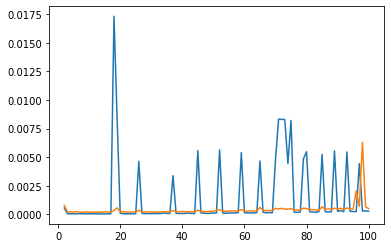

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

def jacobi(M, b, n):

    x=np.ones(len(M))
    D = np.diag(M)
    L = np.tril(M, k = -1)
    U = np.triu(M, k = 1)
    for i in range(n):
        x = (b - np.matmul((L + U),x))/D
    
    return x

x1=[i for i in range(2,101)]
x2=[i for i in range(2,101)]
y1=[]
y2=[]
for i in range(2,101):
  M=np.random.randint(1,100,size=(i,i))
  b=np.random.randint(1,100,size=(i))
  t0=time.time()
  x=np.linalg.solve(M,b)
  t=time.time()-t0
  y1.append(t)
  t0=time.time()
  jacobi(M, b, 10)
  y2.append(time.time()-t0)

plt.plot(x1,y1)
plt.plot(x2,y2)

5) hledání kořenů

In [21]:
import math
from scipy import optimize

def fce1(x):
  
  return x**3 + x**2 - 2

def fce2(x):

  return math.e**(x-1) - 1

def fce3(x):

  return 6*math.sin(3*x)

def bisekce(f,a,b,k):

  t0=time.time()
  for i in range(k):
    c=(a+b)/2
    if (f(a)*f(c))>0:
      a=c
    else:
      b=c
  return c,(time.time()-t0)

A=0
B=5

print(bisekce(fce1,a,b,15))
print(bisekce(fce2,a,b,15))
print(bisekce(fce3,a,b,15))

def scipy_newton(f,a,b):

  t0=time.time()

  return optimize.newton(f,(a+b)/2),time.time()-t0

print(scipy_newton(fce1,a,b))
print(scipy_newton(fce2,a,b))
print(scipy_newton(fce3,a,b))


(0.999908447265625, 3.743171691894531e-05)
(0.999908447265625, 2.7179718017578125e-05)
(0.000152587890625, 2.2172927856445312e-05)
(1.0, 0.0006885528564453125)
(1.00000000000004, 0.0005383491516113281)
(2.0943951023931957, 0.00040078163146972656)


9) integrály

In [22]:
from scipy import integrate
import math

def fce1(x):

  return (x**3 + x**2 - 2)/2

def fce2(x):

  return math.e**(x**2) - 1
def fce3(x):

  return 6*math.sin(3*x+2)

def rie_int(fce,a,b,dx):

  t0=time.time()
  vysledek=0
  while a<5:
    vysledek += dx * (fce(a) + fce(a+dx))/2
    a += dx
  return vysledek,(time.time()-t0)

print(rie_int(fce1,0,5,1/100000))
print(rie_int(fce2,0,5,1/100000))
print(rie_int(fce3,0,5,1/100000))

def scipy_romberg(f,a,b):

  t0=time.time()
  return integrate.romberg(f, a, b), (time.time()-t0)

print(scipy_romberg(fce1,0,5))
print(scipy_romberg(fce2,0,5))
print(scipy_romberg(fce3,0,5))

(93.95907333615929, 0.7342731952667236)
(7354873832.664578, 0.6707360744476318)
(-0.2820246809333154, 0.6777520179748535)
(93.95833333333333, 0.0003046989440917969)
(7354153742.83951, 0.0015337467193603516)
(-0.2819669969910903, 0.0009415149688720703)


7)Monte Carlo
vězňovo dilema

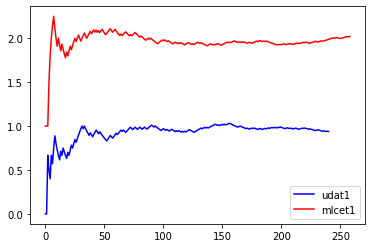

průměr udat: 0.9377593360995851
průměr mlčet: 2.0193050193050195


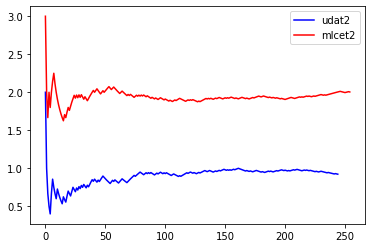

průměr udat: 0.9224489795918367
průměr mlčet: 2.003921568627451


In [15]:
from random import choice
import matplotlib.pyplot as plt

def veznovo_dilema(n_iteraci):

  udat_roky_ve_vezeni1=[]
  udat_soucet_let1=0
  udat_prumerny_pocet_let1=[]
  udat_roky_ve_vezeni2=[]
  udat_soucet_let2=0
  udat_prumerny_pocet_let2=[]
  mlcet_roky_ve_vezeni1=[]
  mlcet_soucet_let1=0
  mlcet_prumerny_pocet_let1=[]
  mlcet_roky_ve_vezeni2=[]
  mlcet_soucet_let2=0
  mlcet_prumerny_pocet_let2=[]

  for i in range(n_iteraci):
    moznosti=["udat","mlcet"]
    volba1=choice(moznosti)
    volba2=choice(moznosti)

    if volba1=="udat":
      
      if volba2=="udat":
        udat_roky_ve_vezeni1.append(2)
        udat_roky_ve_vezeni2.append(2)
        udat_soucet_let1 +=2
        udat_soucet_let2 +=2
        udat_prumerny_pocet_let1.append(udat_soucet_let1/len(udat_roky_ve_vezeni1))
        udat_prumerny_pocet_let2.append(udat_soucet_let2/len(udat_roky_ve_vezeni2))
     
      elif volba2=="mlcet":
        udat_roky_ve_vezeni1.append(0)
        mlcet_roky_ve_vezeni2.append(3)
        mlcet_soucet_let2 +=3
        udat_prumerny_pocet_let1.append(udat_soucet_let1/len(udat_roky_ve_vezeni1))
        mlcet_prumerny_pocet_let2.append(mlcet_soucet_let2/len(mlcet_roky_ve_vezeni2))
   
    elif volba1=="mlcet":
      
      if volba2=="mlcet":
        mlcet_roky_ve_vezeni1.append(1)
        mlcet_roky_ve_vezeni2.append(1)
        mlcet_soucet_let1 +=1
        mlcet_soucet_let2 +=1
        mlcet_prumerny_pocet_let1.append(mlcet_soucet_let1/len(mlcet_roky_ve_vezeni1))
        mlcet_prumerny_pocet_let2.append(mlcet_soucet_let2/len(mlcet_roky_ve_vezeni2))
     
      elif volba2=="udat":
        mlcet_roky_ve_vezeni1.append(3)
        udat_roky_ve_vezeni2.append(0)
        mlcet_soucet_let1 +=3
        mlcet_prumerny_pocet_let1.append(mlcet_soucet_let1/len(mlcet_roky_ve_vezeni1))
        udat_prumerny_pocet_let2.append(udat_soucet_let2/len(udat_roky_ve_vezeni2))

  plt.plot(udat_prumerny_pocet_let1,"b",label="udat1")
  plt.plot(mlcet_prumerny_pocet_let1,"r",label="mlcet1")
  plt.legend()
  plt.show()
  print("průměr udat: "+str(udat_prumerny_pocet_let1[-1]))
  print("průměr mlčet: "+str(mlcet_prumerny_pocet_let1[-1]))
  plt.plot(udat_prumerny_pocet_let2,"b",label="udat2")
  plt.plot(mlcet_prumerny_pocet_let2,"r",label="mlcet2")
  plt.legend()
  plt.show()
  print("průměr udat: "+str(udat_prumerny_pocet_let2[-1]))
  print("průměr mlčet: "+str(mlcet_prumerny_pocet_let2[-1]))
veznovo_dilema(500)



        

